In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
import os
path = os.getcwd() + '/ex1data1.txt'
df = pd.read_csv(path, header=None, names=['Population', 'Profit'])
#1
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [79]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [80]:
#2
x = df.values[:, 0]
y = df.values[:, 1]

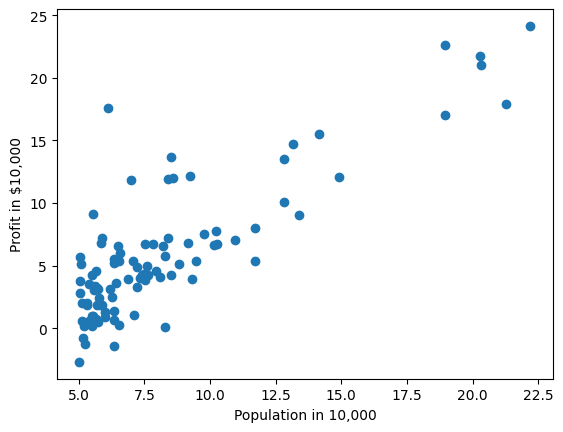

In [81]:
plt.scatter(x, y)
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.show()

In [82]:
#3
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)

In [83]:
#4
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [84]:
theta.shape

(2, 1)

In [85]:
#5
def computeCost(X, y, theta):
    f = theta.transpose() @ X
    m = f.size
    return (1/(2*m))*((f-y)**2).sum()
#6
computeCost(X, y, theta)

32.072733877455676

In [86]:
#7
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    cost = np.zeros(it)
    m = y.size
    for i in range(it):
        h = theta.transpose() @ X
        theta[0,0] -= alpha/m * (h-y).sum()
        theta[1,0] -= alpha/m * ((h-y)*x).sum()
    return theta, cost

alpha = 0.01
it = 1000

In [87]:
#8
theta, cost = simple_gradient(X, y, theta, alpha, it)
theta

array([[-3.2414012],
       [ 1.1272942]], dtype=float32)

In [88]:
#9
computeCost(X, y, theta)

4.515955615224579

In [ ]:
#10

ValueError: x and y must be the same size

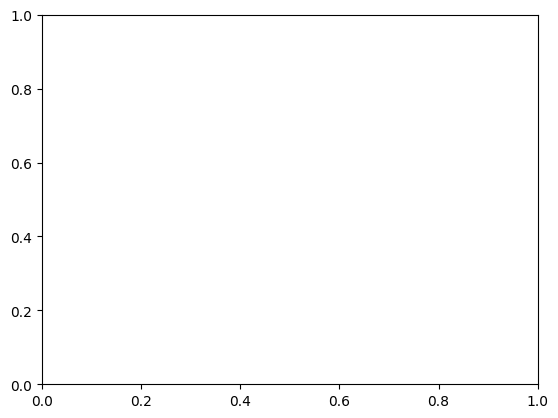

In [89]:
#11
plt.scatter(cost, range(it))
plt.show()